In [1]:
#pip install statsmodels

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
from numpy import mean
from numpy import std
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statistics
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_absolute_error as mae

In [3]:
df = pd.read_csv('Real_Estate.csv')

In [4]:
df

,serialnumber,listyear,daterecorded,town,assessedvalue,saleamount,salesratio,propertytype,residentialtype,nonusecode
0,20009,2020,2020-12-01,Andover,2700,67269.0,0.040137,Vacant Land,Unknown,17 - Two Towns
1,20018,2020,2021-01-21,Andover,100,231000.0,0.000400,Residential,Single Family,17 - Two Towns
2,20021,2020,2021-02-08,Andover,5960,175000.0,0.034057,Vacant Land,Unknown,28 - Use Assessment
3,20028,2020,2021-03-15,Andover,5680,140000.0,0.040571,Vacant Land,Unknown,28 - Use Assessment
4,20035,2020,2021-04-27,Andover,120900,166150.0,0.727656,Residential,Single Family,17 - Two Towns
...,...,...,...,...,...,...,...,...,...,...
185192,60129,2006,2007-07-02,Woodstock,140900,127750.0,1.102935,Single Family,Single Family,24 - Plottage
185193,60141,2006,2007-07-26,Woodstock,228500,238000.0,0.960084,Single Family,Single Family,16 - Charitable Group
185194,60155,2006,2007-08-07,Woodstock,144700,239900.0,0.603168,Single Family,Single Family,07 - Change in Property
185195,60172,2006,2007-08-29,Woodstock,142100,155000.0,0.916774,Single Family,Single Family,07 - Change in Property


In [5]:
newdf = df.drop("daterecorded", axis='columns')

In [6]:
X = df[['listyear', 'town','assessedvalue','salesratio','propertytype','residentialtype','nonusecode']]
y = df['saleamount']

(1000.0, 881510000.0)

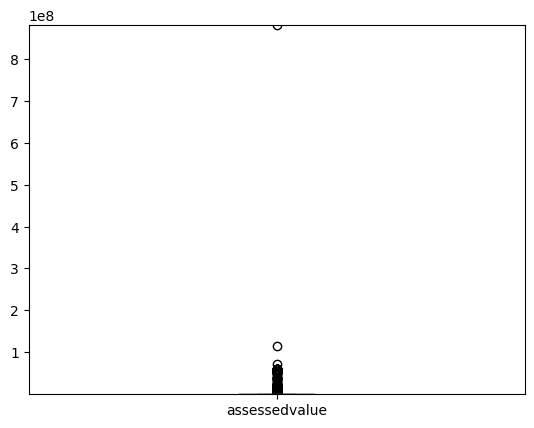

In [7]:
df['assessedvalue'].plot(kind='box')
plt.ylim(1000,881510000)

Mean: 330174.78167135536
Mode: 100000.0
Standard Deviation: 11723253.552722752
Variance 137435415965326.61


Text(0.5, 1.0, 'Density Plot of Skewness')

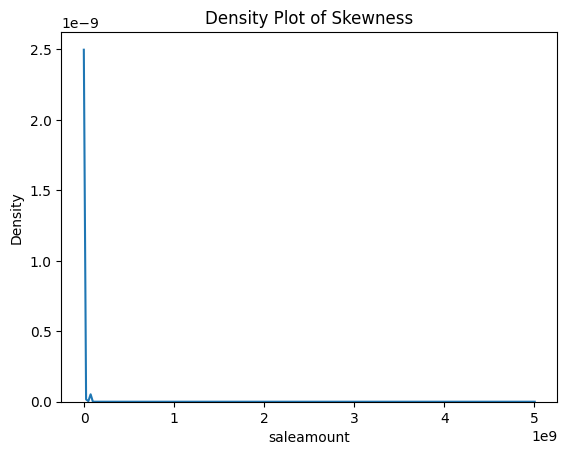

In [8]:
# calculate mean
mean = statistics.mean(df['saleamount'])
print("Mean:", mean)

# calculate mode
mode = statistics.mode(df['saleamount'])
print("Mode:", mode)

# Calculate the standard deviation of the dataset
std_dev = np.std(df['saleamount'])

# Print the standard deviation
print("Standard Deviation:", std_dev)

variance = statistics.variance(df['saleamount'])
print("Variance",variance)

sns.kdeplot(df['saleamount'])
plt.title("Density Plot of Skewness")


Mean: 242524.70981711367
Mode: 0
Standard Deviation: 2323026.7809528
Variance 5396482564170.698


Text(0.5, 1.0, 'Density Plot of Skewness')

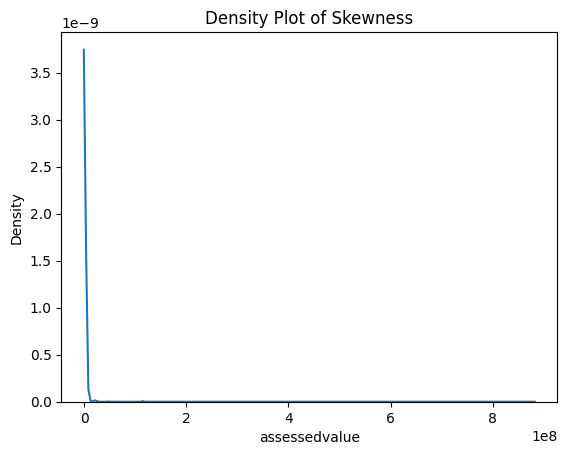

In [9]:
# calculate mean
mean = statistics.mean(df['assessedvalue'])
print("Mean:", mean)

# calculate mode
mode = statistics.mode(df['assessedvalue'])
print("Mode:", mode)

# Calculate the standard deviation of the dataset
std_dev = np.std(df['assessedvalue'])

# Print the standard deviation
print("Standard Deviation:", std_dev)

variance = statistics.variance(df['assessedvalue'])
print("Variance",variance)

sns.kdeplot(df['assessedvalue'])
plt.title("Density Plot of Skewness")


Mean: 2013.5886704428258
Mode: 2014
Standard Deviation: 4.228055260205696
Variance 17.876547810552804


Text(0.5, 1.0, 'Density Plot of Skewness')

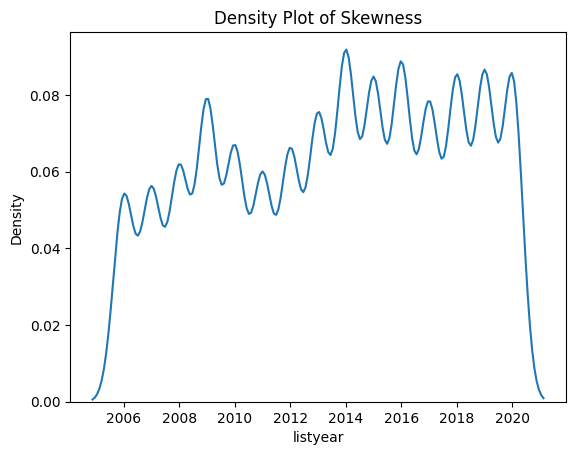

In [10]:
# calculate mean
mean = statistics.mean(df['listyear'])
print("Mean:", mean)

# calculate mode
mode = statistics.mode(df['listyear'])
print("Mode:", mode)

# Calculate the standard deviation of the dataset
std_dev = np.std(df['listyear'])

# Print the standard deviation
print("Standard Deviation:", std_dev)

variance = statistics.variance(df['listyear'])
print("Variance",variance)

sns.kdeplot(df['listyear'])
plt.title("Density Plot of Skewness")


Mean: 17.11444612652972
Mode: 0.0
Standard Deviation: 3264.83564035499
Variance 10659209.3145904


Text(0.5, 1.0, 'Density Plot of Skewness')

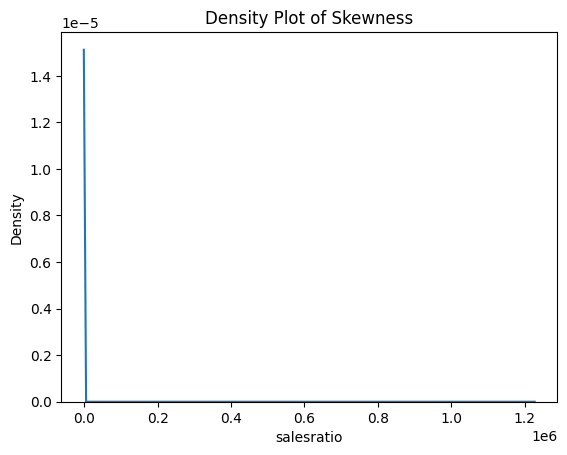

In [11]:
# calculate mean
mean = statistics.mean(df['salesratio'])
print("Mean:", mean)

# calculate mode
mode = statistics.mode(df['salesratio'])
print("Mode:", mode)

# Calculate the standard deviation of the dataset
std_dev = np.std(df['salesratio'])

# Print the standard deviation
print("Standard Deviation:", std_dev)

variance = statistics.variance(df['salesratio'])
print("Variance",variance)

sns.kdeplot(df['salesratio'])
plt.title("Density Plot of Skewness")


In [12]:
df = df.drop(df[df['assessedvalue'] == 881510000].index)

In [13]:
df

,serialnumber,listyear,daterecorded,town,assessedvalue,saleamount,salesratio,propertytype,residentialtype,nonusecode
0,20009,2020,2020-12-01,Andover,2700,67269.0,0.040137,Vacant Land,Unknown,17 - Two Towns
1,20018,2020,2021-01-21,Andover,100,231000.0,0.000400,Residential,Single Family,17 - Two Towns
2,20021,2020,2021-02-08,Andover,5960,175000.0,0.034057,Vacant Land,Unknown,28 - Use Assessment
3,20028,2020,2021-03-15,Andover,5680,140000.0,0.040571,Vacant Land,Unknown,28 - Use Assessment
4,20035,2020,2021-04-27,Andover,120900,166150.0,0.727656,Residential,Single Family,17 - Two Towns
...,...,...,...,...,...,...,...,...,...,...
185192,60129,2006,2007-07-02,Woodstock,140900,127750.0,1.102935,Single Family,Single Family,24 - Plottage
185193,60141,2006,2007-07-26,Woodstock,228500,238000.0,0.960084,Single Family,Single Family,16 - Charitable Group
185194,60155,2006,2007-08-07,Woodstock,144700,239900.0,0.603168,Single Family,Single Family,07 - Change in Property
185195,60172,2006,2007-08-29,Woodstock,142100,155000.0,0.916774,Single Family,Single Family,07 - Change in Property


In [14]:
labelencoder = LabelEncoder()

In [15]:
#label encoding
df['town']= labelencoder.fit_transform(df['town'])
  
df['town'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  19,  20,  22,  23,  24,  25,  27,  28,
        29,  30,  31,  32,  33,  34,  36,  45,  38,  39,  41,  42,  43,
        46,  44,  48,  49,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        62,  63,  65,  66,  67,  68,  69,  70,  72,  73,  74,  75,  76,
        77,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  96,  97,  99, 100, 102, 103, 104, 105, 106, 108,
       109, 110, 112, 113, 115, 116, 117, 118, 119, 120, 122, 124, 125,
       126, 127, 130, 129, 132, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 155, 153, 156,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,  18,  21,
        26,  35,  37,  40,  47,  50,  60,  61,  64,  71,  78,  95,  94,
        98, 101, 107, 111, 114, 121, 123, 128, 131, 133, 146, 154, 157])

In [16]:
#label encoding
df['propertytype']= labelencoder.fit_transform(df['propertytype'])
  
df['propertytype'].unique()

array([10,  6,  1,  0,  4,  5,  7,  9,  8,  2,  3])

In [17]:
#label encoding
df['residentialtype']= labelencoder.fit_transform(df['residentialtype'])
  
df['residentialtype'].unique()

array([5, 2, 4, 0, 1, 3])

In [18]:
#label encoding
df['nonusecode'].unique

<bound method Series.unique of 0                  17 - Two Towns
1                  17 - Two Towns
2             28 - Use Assessment
3             28 - Use Assessment
4                  17 - Two Towns
                   ...           
185192              24 - Plottage
185193      16 - Charitable Group
185194    07 - Change in Property
185195    07 - Change in Property
185196        28 - Use Assessment
Name: nonusecode, Length: 185196, dtype: object>

In [19]:
df['nonusecode']= labelencoder.fit_transform(df['nonusecode'])
  
df['nonusecode'].unique()

array([16, 27,  0, 24,  6, 25, 23,  7,  2,  4,  8,  9, 17, 13, 11, 21,  5,
        3, 15, 10, 12, 22, 14, 18,  1, 19, 26, 20, 29, 28])

In [20]:
a = df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25092\2979807061.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


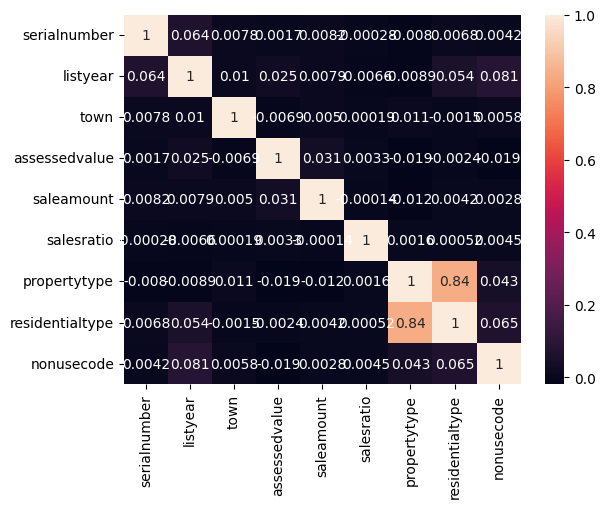

In [21]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [22]:
X = df[['town','assessedvalue']]
y = df['saleamount']

In [23]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
#multiple linear regression model
linreg=linear_model.LinearRegression()
X = sm.add_constant(X)
linreg.fit(X_train,y_train)


LinearRegression()

In [25]:
y_pred=linreg.predict(X_test)
y_pred

array([197607.57864582, 215620.75591052, 296295.67301723, ...,
       278915.43126212, 277485.01346683, 347553.42756682])

In [26]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 0.87


In [27]:
mse = mean_squared_error(y_test, y_pred)

In [28]:
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 1488238.9700814632


In [29]:
r_squared = linreg.score(X_train,y_train)

In [30]:
r_squared

0.0009300593799549395

In [31]:
print('Mean Absolute Error:',mae(y_test,y_pred))

Mean Absolute Error: 257099.16952506758
